In [1]:
!pip install scikit-plot

# Importing Important Libraries

In [2]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score

import warnings
warnings.filterwarnings('ignore')

# Importing the dataset 

In [3]:
data=pd.read_excel(r'C:\Users\monish\Downloads\Customer_retention_dataset--1-\Customer_retention_dataset\customer_retention_dataset.xlsx')
data

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

# data.info gives which type of data's are available
# All the data are of 'Object' type so first we will analysis and then we will convert into coded language using log_transformer,LabelEncoder

In [5]:
for each_col in data.columns:
    print(each_col)
    print(data[each_col].value_counts())
    print("")

1Gender of respondent
Female    181
Male       88
Name: 1Gender of respondent, dtype: int64

2 How old are you? 
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you? , dtype: int64

3 Which city do you shop online from?
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64

4 What is the Pin Code of where you shop online from?
201308    38
132001    19
201310    18
110044    16
173212     9
250001     9
173229     9
560037     8
132036     8
560010     8
122018     8
110011     7
201306     7
110008     7
110014     6
110018     6
244001     5
201312     5
530068     5
201305     5
201009     5
201008     5
201005     4
201001     4
201304     4
110039     4
110030     4

indifferent (3)          88
Agree (4)                88
Strongly agree (5)       38
Strongly disagree (1)    33
Dis-agree (2)            22
Name: 46 Shopping on the website helps you fulfill certain roles, dtype: int64

47 Getting value for money spent
Agree (4)             149
Strongly agree (5)     82
indifferent (3)        38
Name: 47 Getting value for money spent, dtype: int64

From the following, tick any (or all) of the online retailers you have shopped from;                                                                           
Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com    82
Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com               44
Amazon.in, Flipkart.com                                         32
Amazon.in, Flipkart.com, Paytm.com, Snapdeal.com                29
Amazon.in, Flipkart.com, Snapdeal.com                           27
Amazon.in, Paytm.com, Myntra.com                                20
Amazon.in                                            


# each_column.value.counts() will tell you what type of columns are available and its quantity

Most of the shopping has done via Mobile 'internet' and 'wifi'
Smartphone is the convenient to shop online
"Google Chrome" browser is used by highest no of people than any of the browser
Till now also people use 'Search Engine'.It means they shop what they want
Content Marketing' and 'display Adverts have less impact on the people'
People in india give less time to research a product before buying...they search only for '15 mins' before buying the product.
'credit/debit cards' are preferred more for online payment.
people leave the 'shopping cart' for better alternative offer.
people think website content is easy to read and understand.
product comparision is always important for the better understanding in selecting the product..
for any product to be displayed it means seller and product description is as important according to an Indian population.
Indian People want Ease of navigation so that they can buy the product easily.
to buy any product people agree that loading and processing speed should be high.
People also agree with the 'User Friendly Interface'.
people need convinent method for payment.
E-retailer have empathy towards the customers
people think they get more benefit and discount on online product
people especially 'female' feel enjoyment from online shopping.
online shopping is convinient and flexible.
people prefer to shop online only on those website which are of good quality website or application.
user satisfaction cannot exit without trust.
Female think that online shopping leads to Monetary saving.


In [6]:
data.isna().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

# data.isna().sum() will tell how many missing data is available in the dataset
# We can see there is no missing data available in it

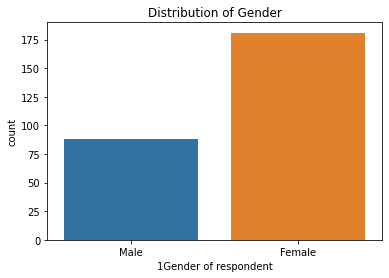

In [7]:
# See the distribution of gender to recognize different distributions
sns.countplot(x='1Gender of respondent', data=data);
plt.title('Distribution of Gender');

## There are more women than men in this data set.They will perhaps be a significant element in your customer segmentation efforts later.

<AxesSubplot:xlabel='2 How old are you? ', ylabel='count'>

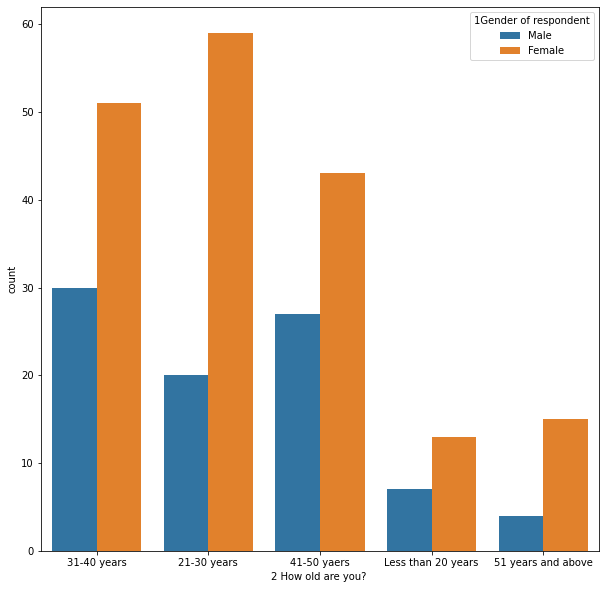

In [8]:
# See the distribution of Ages to recognize different distributions
plt.figure(figsize=(10,10))
sns.countplot(x='2 How old are you? ', hue='1Gender of respondent', data=data)

In [9]:
# There are more people who shop online in the age-group of "21-30" and in every age-group 'Females' are more.
# You can see the spike around the age of 21-30 for the women who are in the majority.  
# There is a significant amount of senior Women in the 51 years old bucket.

<AxesSubplot:xlabel='3 Which city do you shop online from?', ylabel='count'>

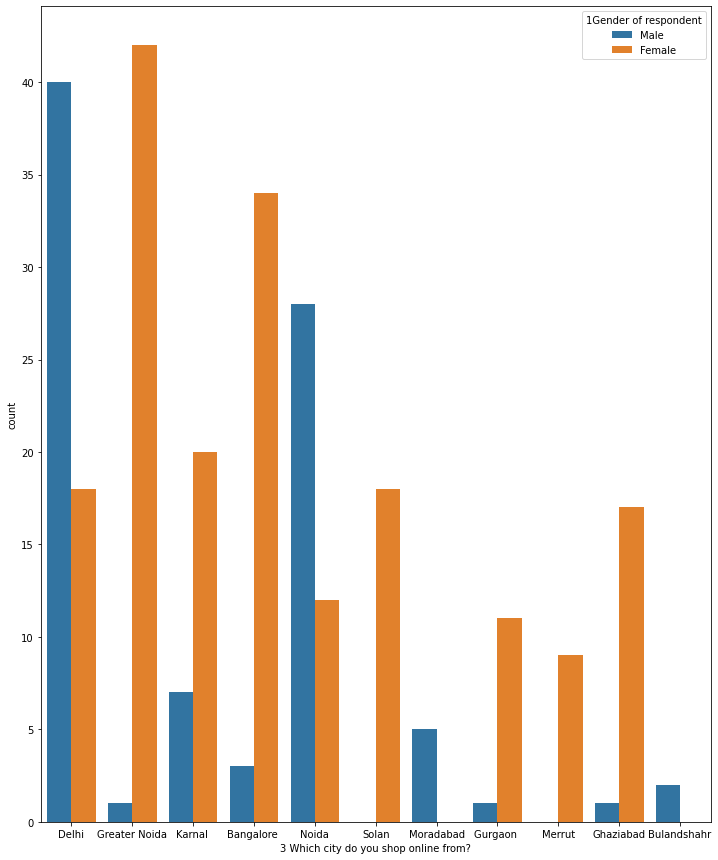

In [10]:
# See the distribution of Ages to recognize different distributions
plt.figure(figsize=(12,15))
sns.countplot(x='3 Which city do you shop online from?', hue='1Gender of respondent', data=data)

# Highest no of'Female' who shops online from 'Greater Noida' City.
# There is more number of 'Male' who shop's online from 'Delhi' and 'Noida' City.
# Cities from 'Solan' and 'Merrut' only 'Female' who shop's online and there is NO Male who shop's Online.
# Cities from 'Moradabad' and 'Bulandshahr' only 'Male' who shop's online and there is NO Female who shop's Online.

<AxesSubplot:xlabel='5 Since How Long You are Shopping Online ?', ylabel='count'>

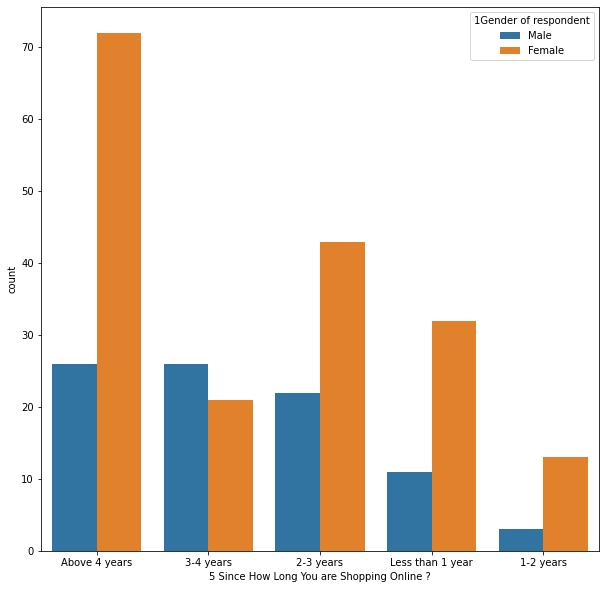

In [11]:
# See the distribution of Ages to recognize different distributions
plt.figure(figsize=(10,10))
sns.countplot(x='5 Since How Long You are Shopping Online ?', hue='1Gender of respondent', data=data)

# 'Female' are more consistent in shopping Online over a longer period of time

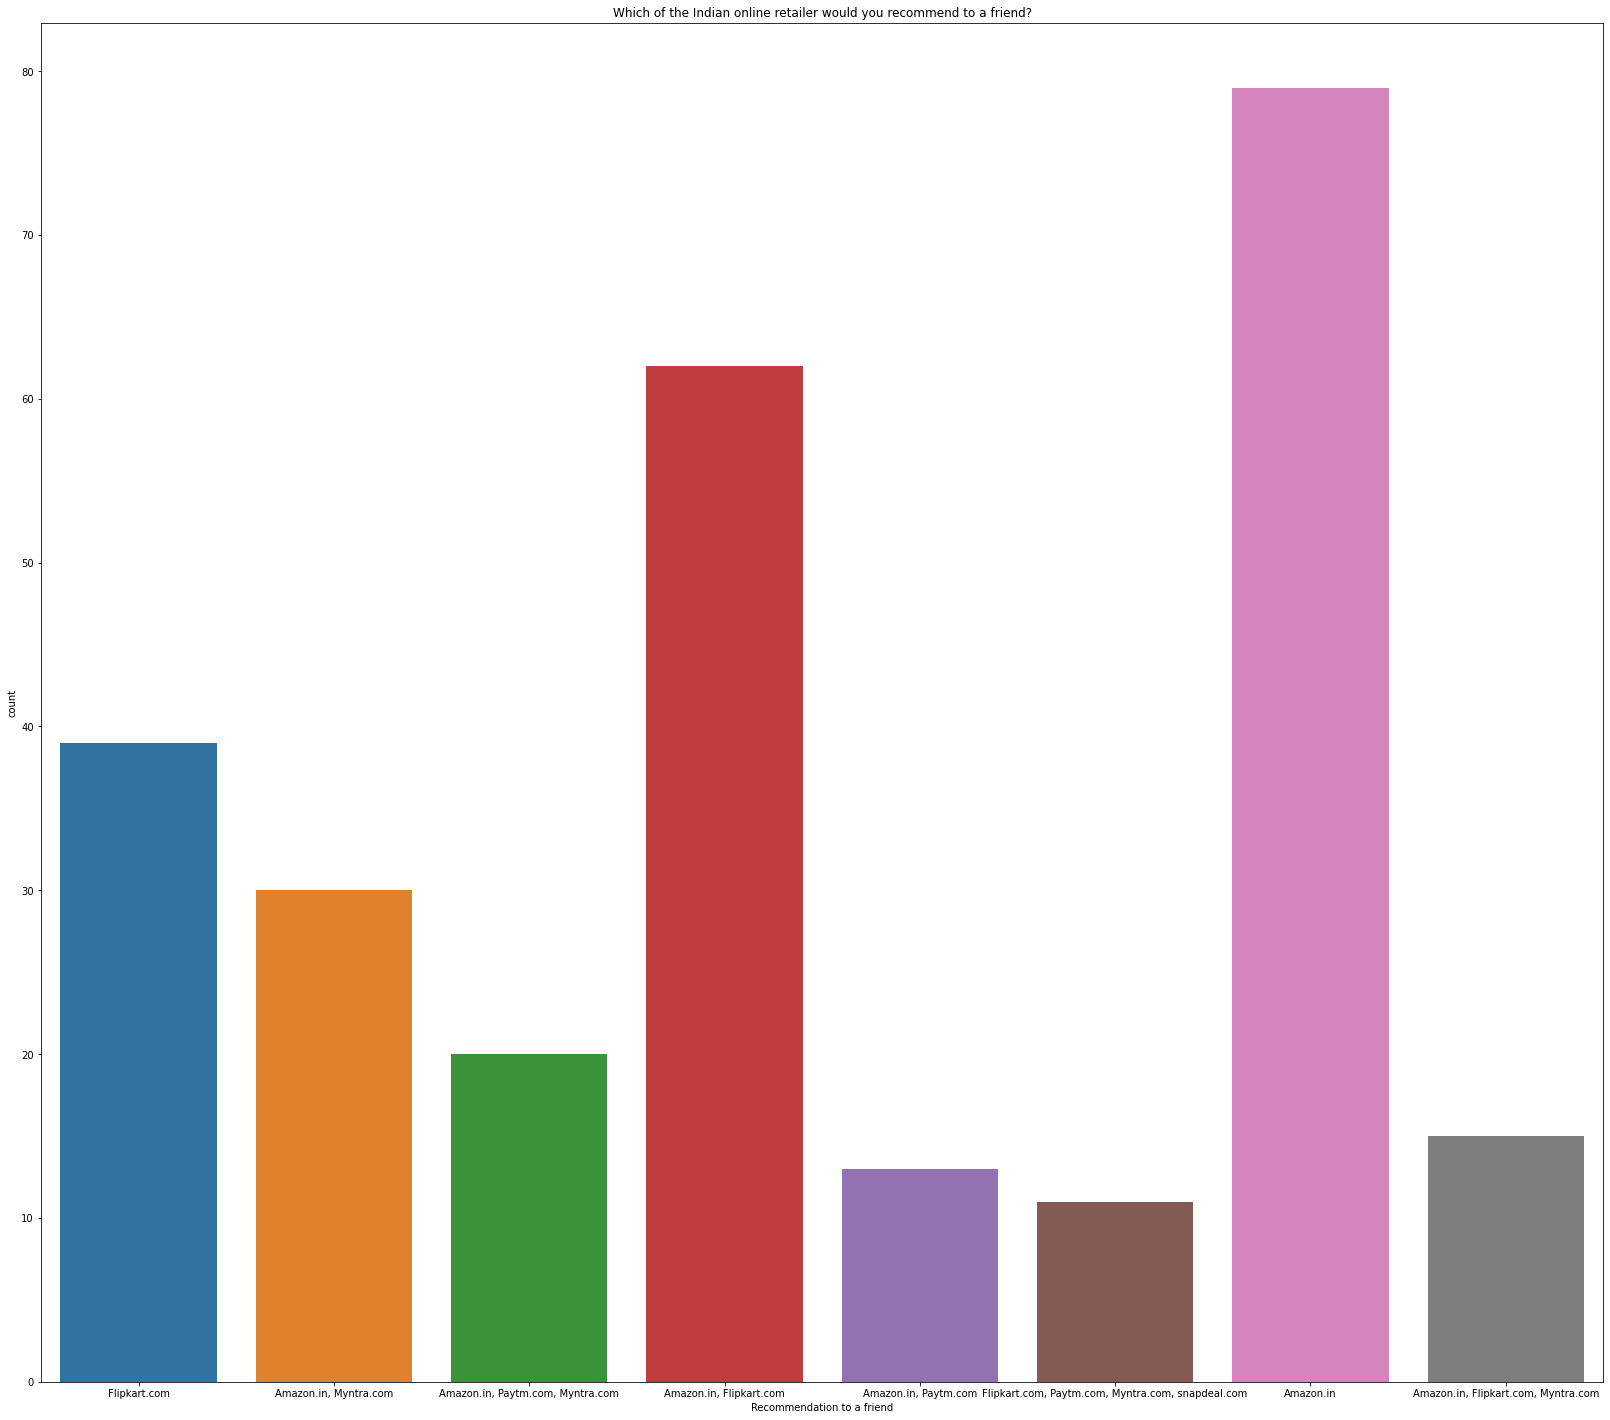

In [12]:
plt.figure(figsize=(28,25))
sns.countplot(x='Which of the Indian online retailer would you recommend to a friend?',data=data);
plt.title('Which of the Indian online retailer would you recommend to a friend?');
plt.xlabel('Recommendation to a friend');


# people recommendation more for 'amazon.in' and 'flipkart.com'.
# people find this brand as more loyal and they trust more so that they recommended to a friend.

<AxesSubplot:xlabel='41 Monetary savings', ylabel='count'>

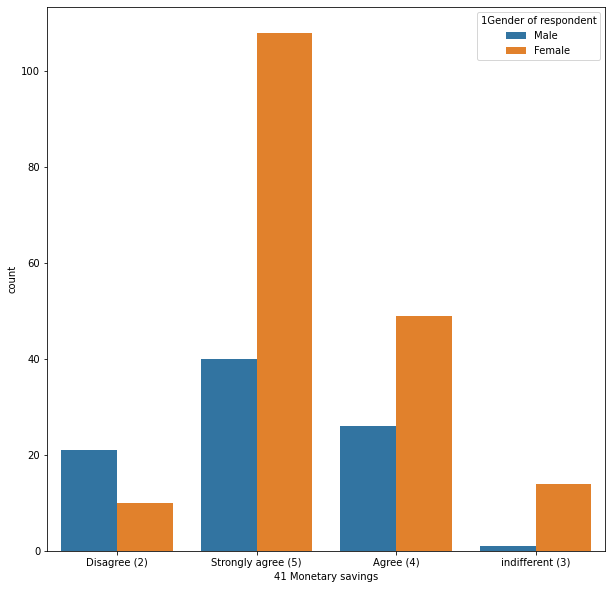

In [13]:
# See the distribution of Monetary saving to recognize different distributions
plt.figure(figsize=(10,10))
sns.countplot(x='41 Monetary savings', hue='1Gender of respondent', data=data)



# Female think that online shopping is a monetary saving while 'Men' disagree to it

<AxesSubplot:xlabel='43 Shopping on the website gives you the sense of adventure', ylabel='count'>

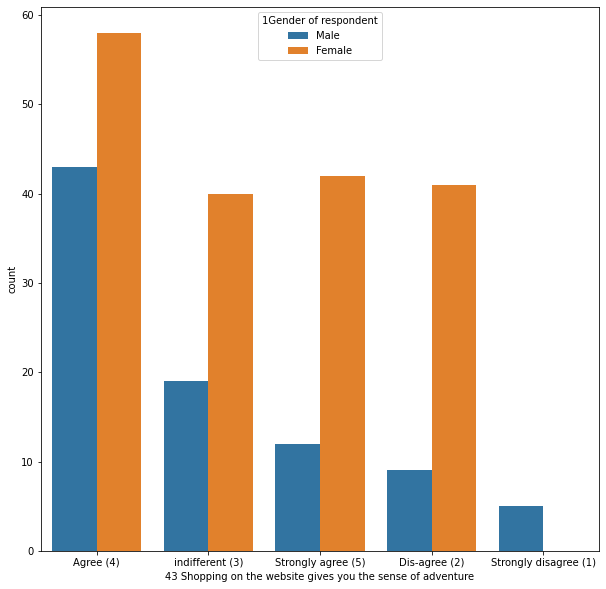

In [14]:
# See the distribution of sense of adventure to recognize different distributions
plt.figure(figsize=(10,10))
sns.countplot(x='43 Shopping on the website gives you the sense of adventure', hue='1Gender of respondent', data=data)


# Female agree that shopping online is great adventure

<AxesSubplot:xlabel='47 Getting value for money spent', ylabel='count'>

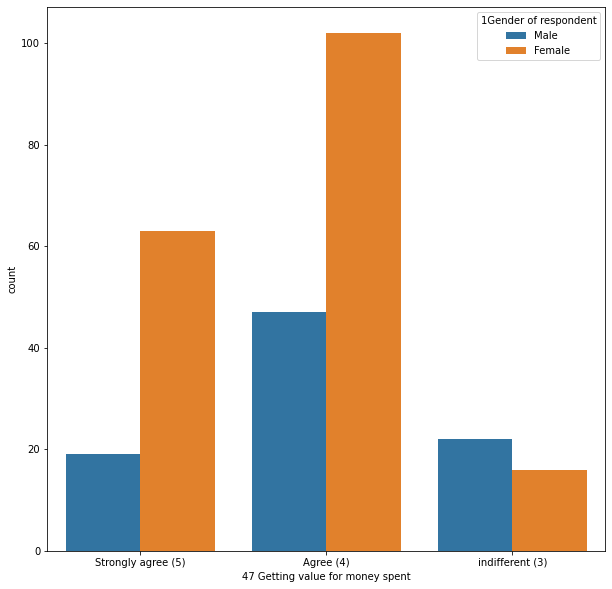

In [15]:

# See the distribution of Getting value for money spent to recognize different distributions
plt.figure(figsize=(10,10))
sns.countplot(x='47 Getting value for money spent', hue='1Gender of respondent', data=data)

# people agree with whatever they spent is what they get.

<AxesSubplot:xlabel='Speedy order delivery ', ylabel='count'>

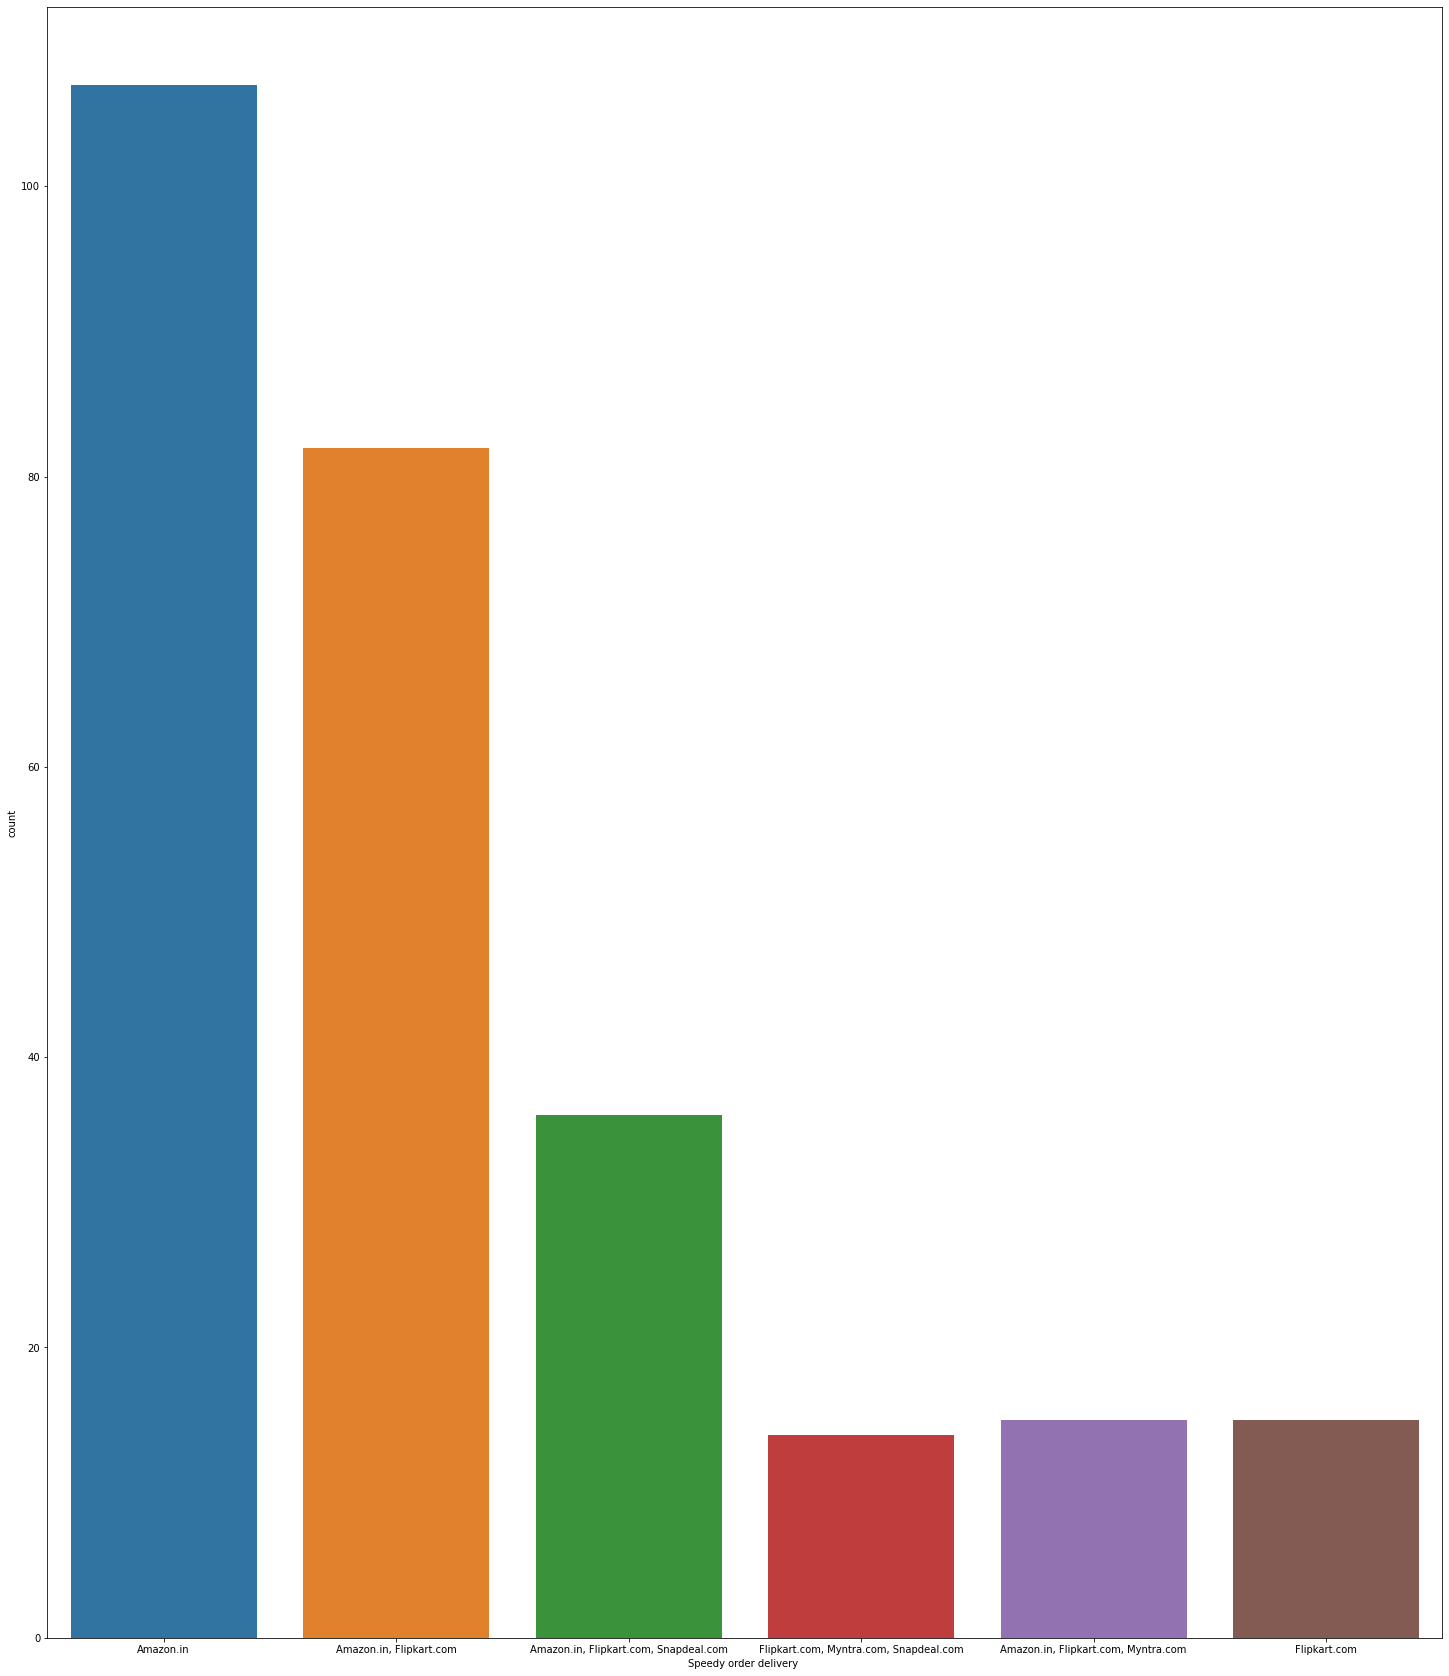

In [16]:
# See the distribution of speedy order delivery to recognize different distributions
plt.figure(figsize=(25,30))
sns.countplot(x='Speedy order delivery ', data=data)

## "amazon.in and Flipkart.com" delivery thier order very fast.In customer retention,it plays an important role 

<AxesSubplot:xlabel='Privacy of customers’ information', ylabel='count'>

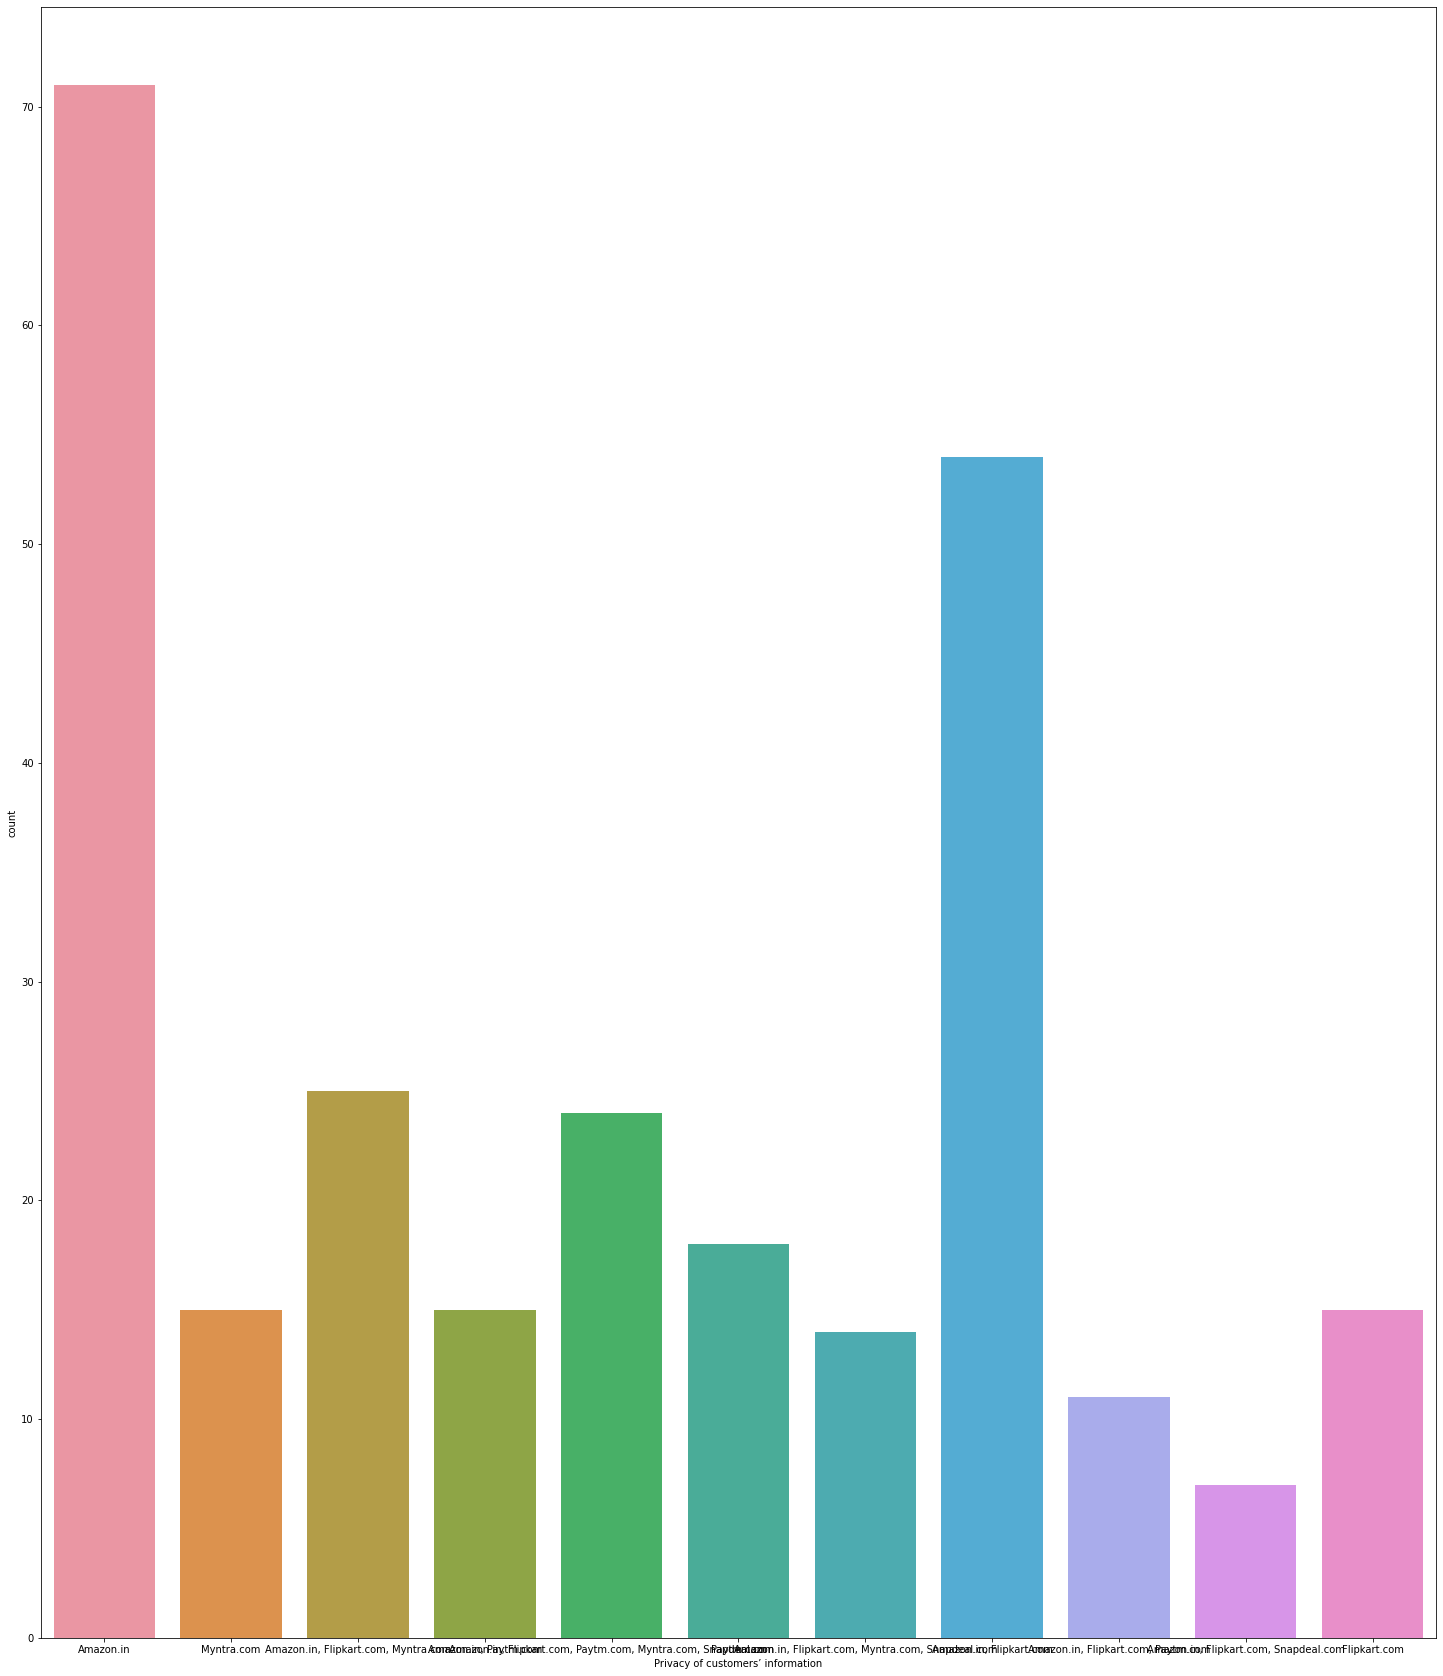

In [17]:
# See the distribution of privacy of customer's to recognize different distributions
plt.figure(figsize=(25,30))
sns.countplot(x='Privacy of customers’ information', data=data)

<AxesSubplot:xlabel='Change in website/Application design', ylabel='count'>

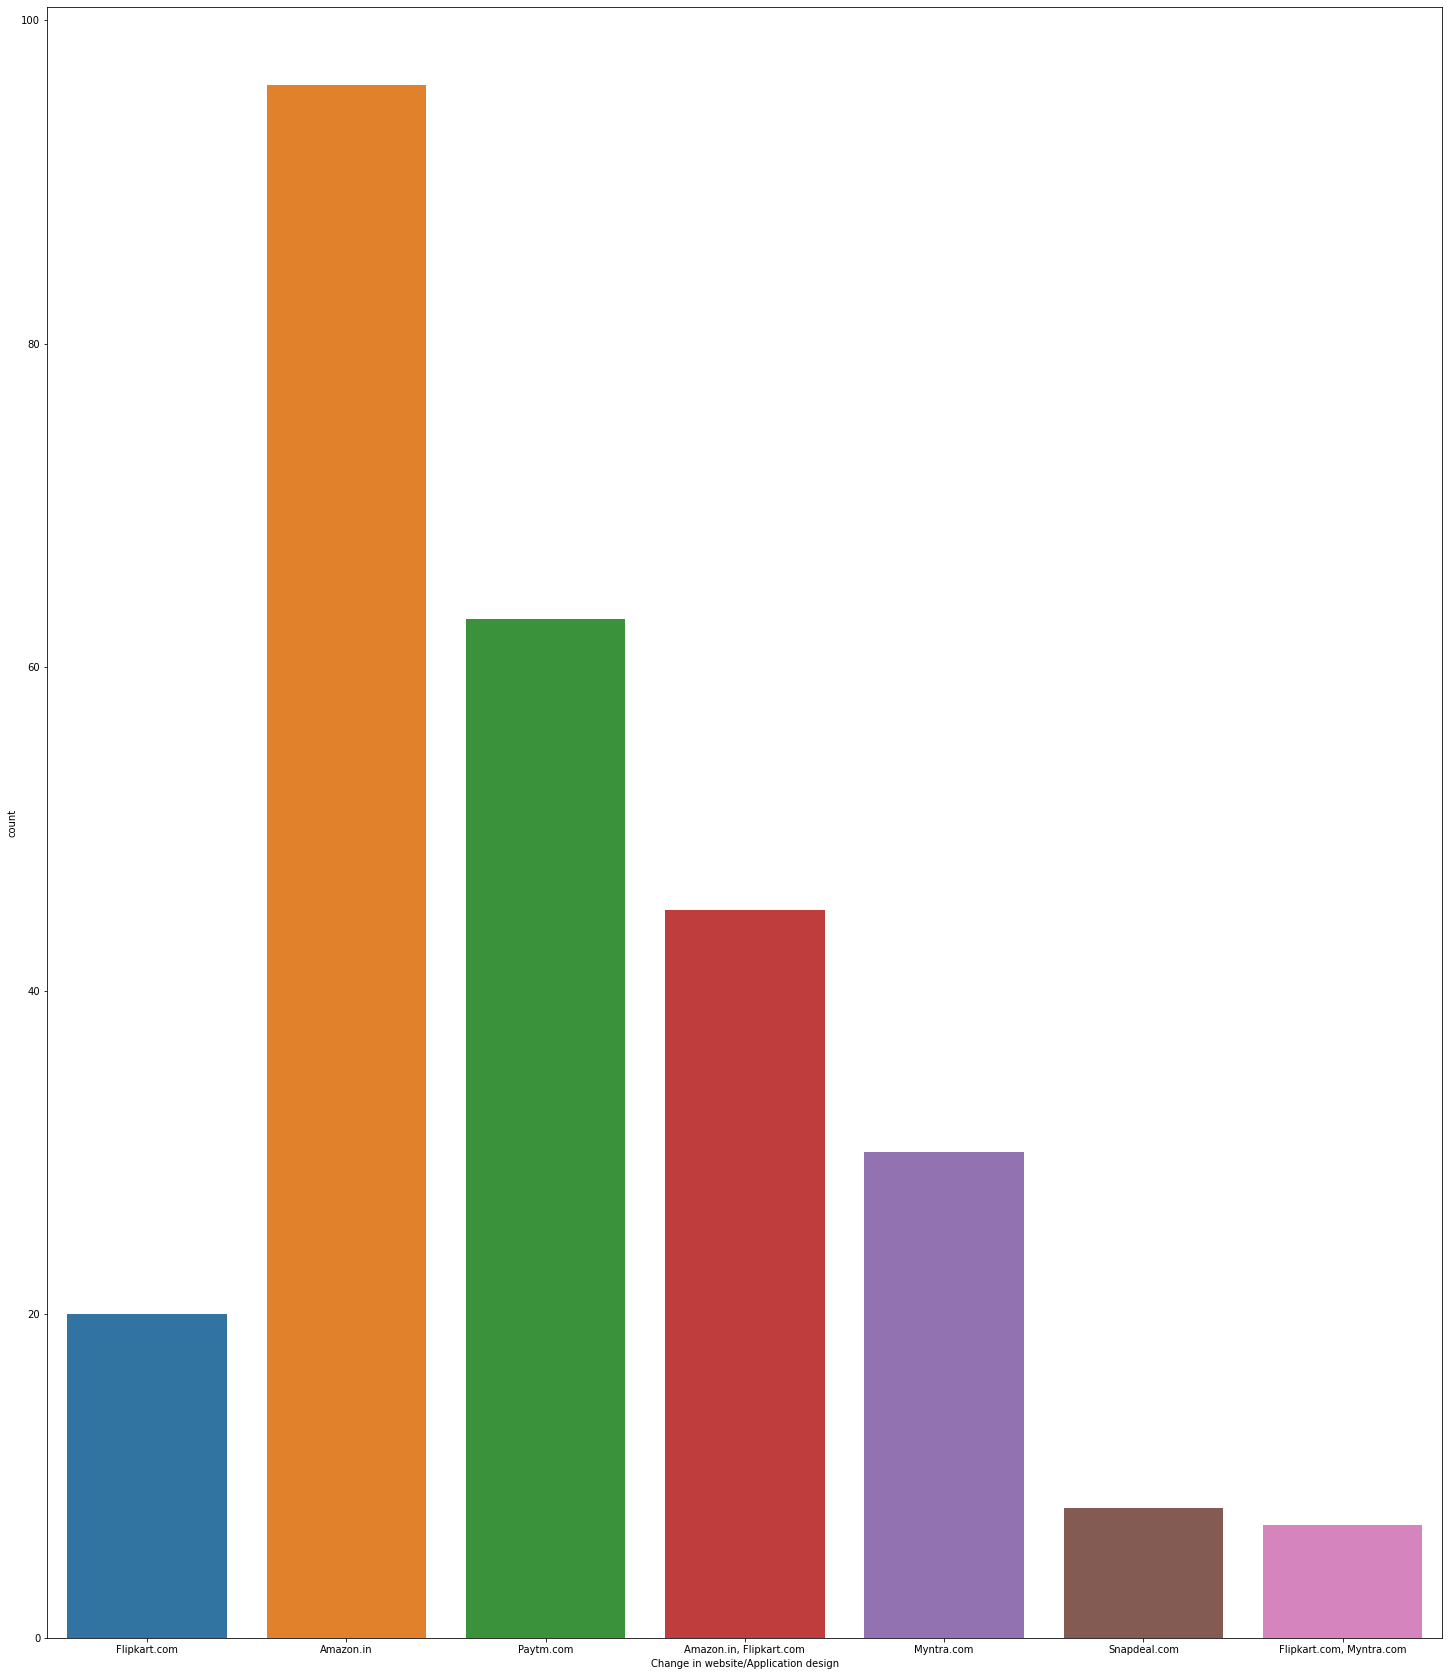

In [18]:
# See the distribution of  Change in website/Application design to recognize different distributions
plt.figure(figsize=(25,30))
sns.countplot(x='Change in website/Application design', data=data)

# After particular point of time,customer need change and if they find according to their needs,it will holds more customer in their basket,so according to the time we have to change.

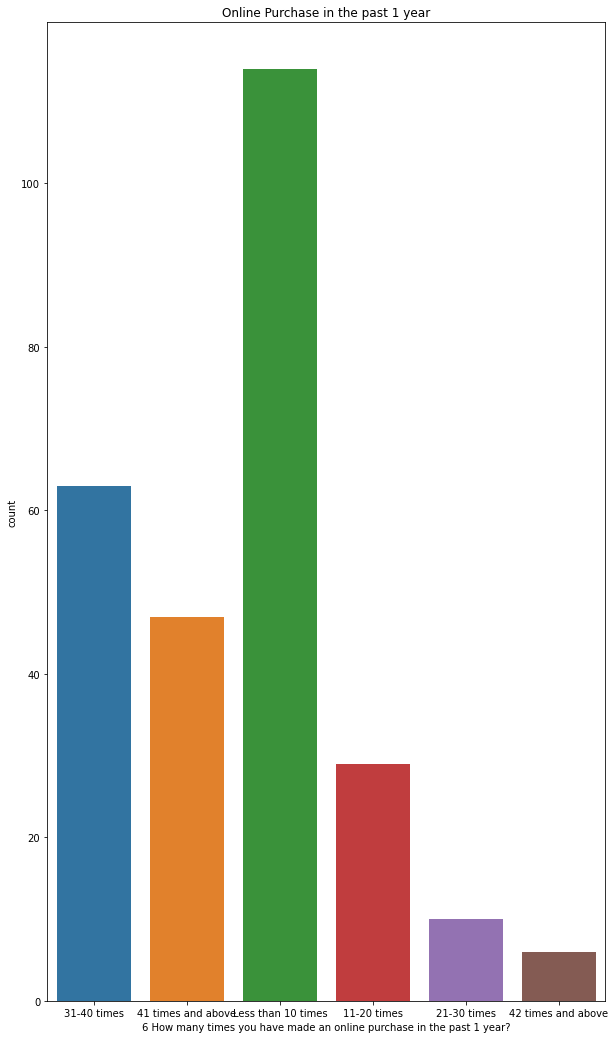

In [19]:
# See the distribution of Online Purchase in the past 1 year to recognize different distributions
plt.figure(figsize=(10,18))
sns.countplot(x='6 How many times you have made an online purchase in the past 1 year?', data=data);
plt.title('Online Purchase in the past 1 year');

# This graph will tell you how many times people usually buy online in the past 1 year

# we will convert the 'Object' datatype into 'int' using "LabelEncoder"

In [20]:
for var in data:
    le=LabelEncoder()
    data[var]=le.fit_transform(data[var].astype('str'))
data.dtypes

1Gender of respondent                                                   int32
2 How old are you?                                                      int32
3 Which city do you shop online from?                                   int32
4 What is the Pin Code of where you shop online from?                   int32
5 Since How Long You are Shopping Online ?                              int32
                                                                        ...  
Longer delivery period                                                  int32
Change in website/Application design                                    int32
Frequent disruption when moving from one page to another                int32
Website is as efficient as before                                       int32
Which of the Indian online retailer would you recommend to a friend?    int32
Length: 71, dtype: object

In [21]:
data.skew()

1Gender of respondent                                                   0.741028
2 How old are you?                                                      0.680987
3 Which city do you shop online from?                                   0.313729
4 What is the Pin Code of where you shop online from?                   0.114537
5 Since How Long You are Shopping Online ?                             -0.276968
                                                                          ...   
Longer delivery period                                                 -0.147702
Change in website/Application design                                    0.354163
Frequent disruption when moving from one page to another               -0.100608
Website is as efficient as before                                       0.662084
Which of the Indian online retailer would you recommend to a friend?    0.583614
Length: 71, dtype: float64

# data.skew() will check the skewness in the dataset.if there is a skewness in the dataset ,we will use z-score or standard scalar to remove the outlier/skewness

# From the data.skew(),we find that data is in proper range(i.e 0 to 1)

In [22]:
data.corr()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
1Gender of respondent,1.000000,0.046169,0.080912,-0.289628,-0.057096,0.077876,-0.309029,0.061673,0.028794,-0.019243,...,-0.101925,-0.228744,-0.061374,0.008289,-0.158941,0.060838,-0.164818,-0.256638,0.055663,-0.003372
2 How old are you?,0.046169,1.000000,0.113712,-0.133946,-0.087847,0.309575,0.255594,0.022383,-0.006101,-0.048087,...,-0.281877,-0.095850,-0.064601,-0.128064,-0.198658,-0.156173,-0.134558,-0.018825,-0.008582,-0.135263
3 Which city do you shop online from?,0.080912,0.113712,1.000000,-0.064136,-0.138329,0.173871,-0.010436,0.020650,0.199296,-0.051642,...,-0.065450,-0.115453,-0.293441,-0.104340,-0.263921,-0.123369,0.000427,0.019167,0.007117,-0.142123
4 What is the Pin Code of where you shop online from?,-0.289628,-0.133946,-0.064136,1.000000,-0.074280,-0.304554,-0.035490,-0.021647,-0.116924,-0.051971,...,0.003349,0.128535,-0.051135,-0.023184,-0.045831,-0.076998,0.001954,0.113557,-0.008289,-0.097320
5 Since How Long You are Shopping Online ?,-0.057096,-0.087847,-0.138329,-0.074280,1.000000,0.013315,0.226883,-0.125240,0.139924,0.274201,...,0.154763,-0.063386,0.305533,0.086616,0.159591,0.218641,0.220347,0.025919,-0.024316,0.136106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Longer delivery period,0.060838,-0.156173,-0.123369,-0.076998,0.218641,-0.130651,0.101297,-0.104665,0.048533,0.397953,...,0.268484,0.365030,0.598200,0.797480,0.593167,1.000000,0.329965,0.475654,0.247471,0.428419
Change in website/Application design,-0.164818,-0.134558,0.000427,0.001954,0.220347,0.007841,0.147770,-0.052146,0.418180,0.059894,...,0.370649,0.152655,0.035417,0.225618,0.214103,0.329965,1.000000,0.436573,-0.189925,0.423877
Frequent disruption when moving from one page to another,-0.256638,-0.018825,0.019167,0.113557,0.025919,-0.127148,0.349813,0.084876,-0.065658,0.111380,...,0.274454,0.603750,0.332032,0.614528,0.506431,0.475654,0.436573,1.000000,0.363440,0.122953
Website is as efficient as before,0.055663,-0.008582,0.007117,-0.008289,-0.024316,-0.124076,0.266932,0.333868,-0.100462,-0.128611,...,0.122555,-0.010967,0.123087,0.319264,0.275338,0.247471,-0.189925,0.363440,1.000000,0.252154


<AxesSubplot:>

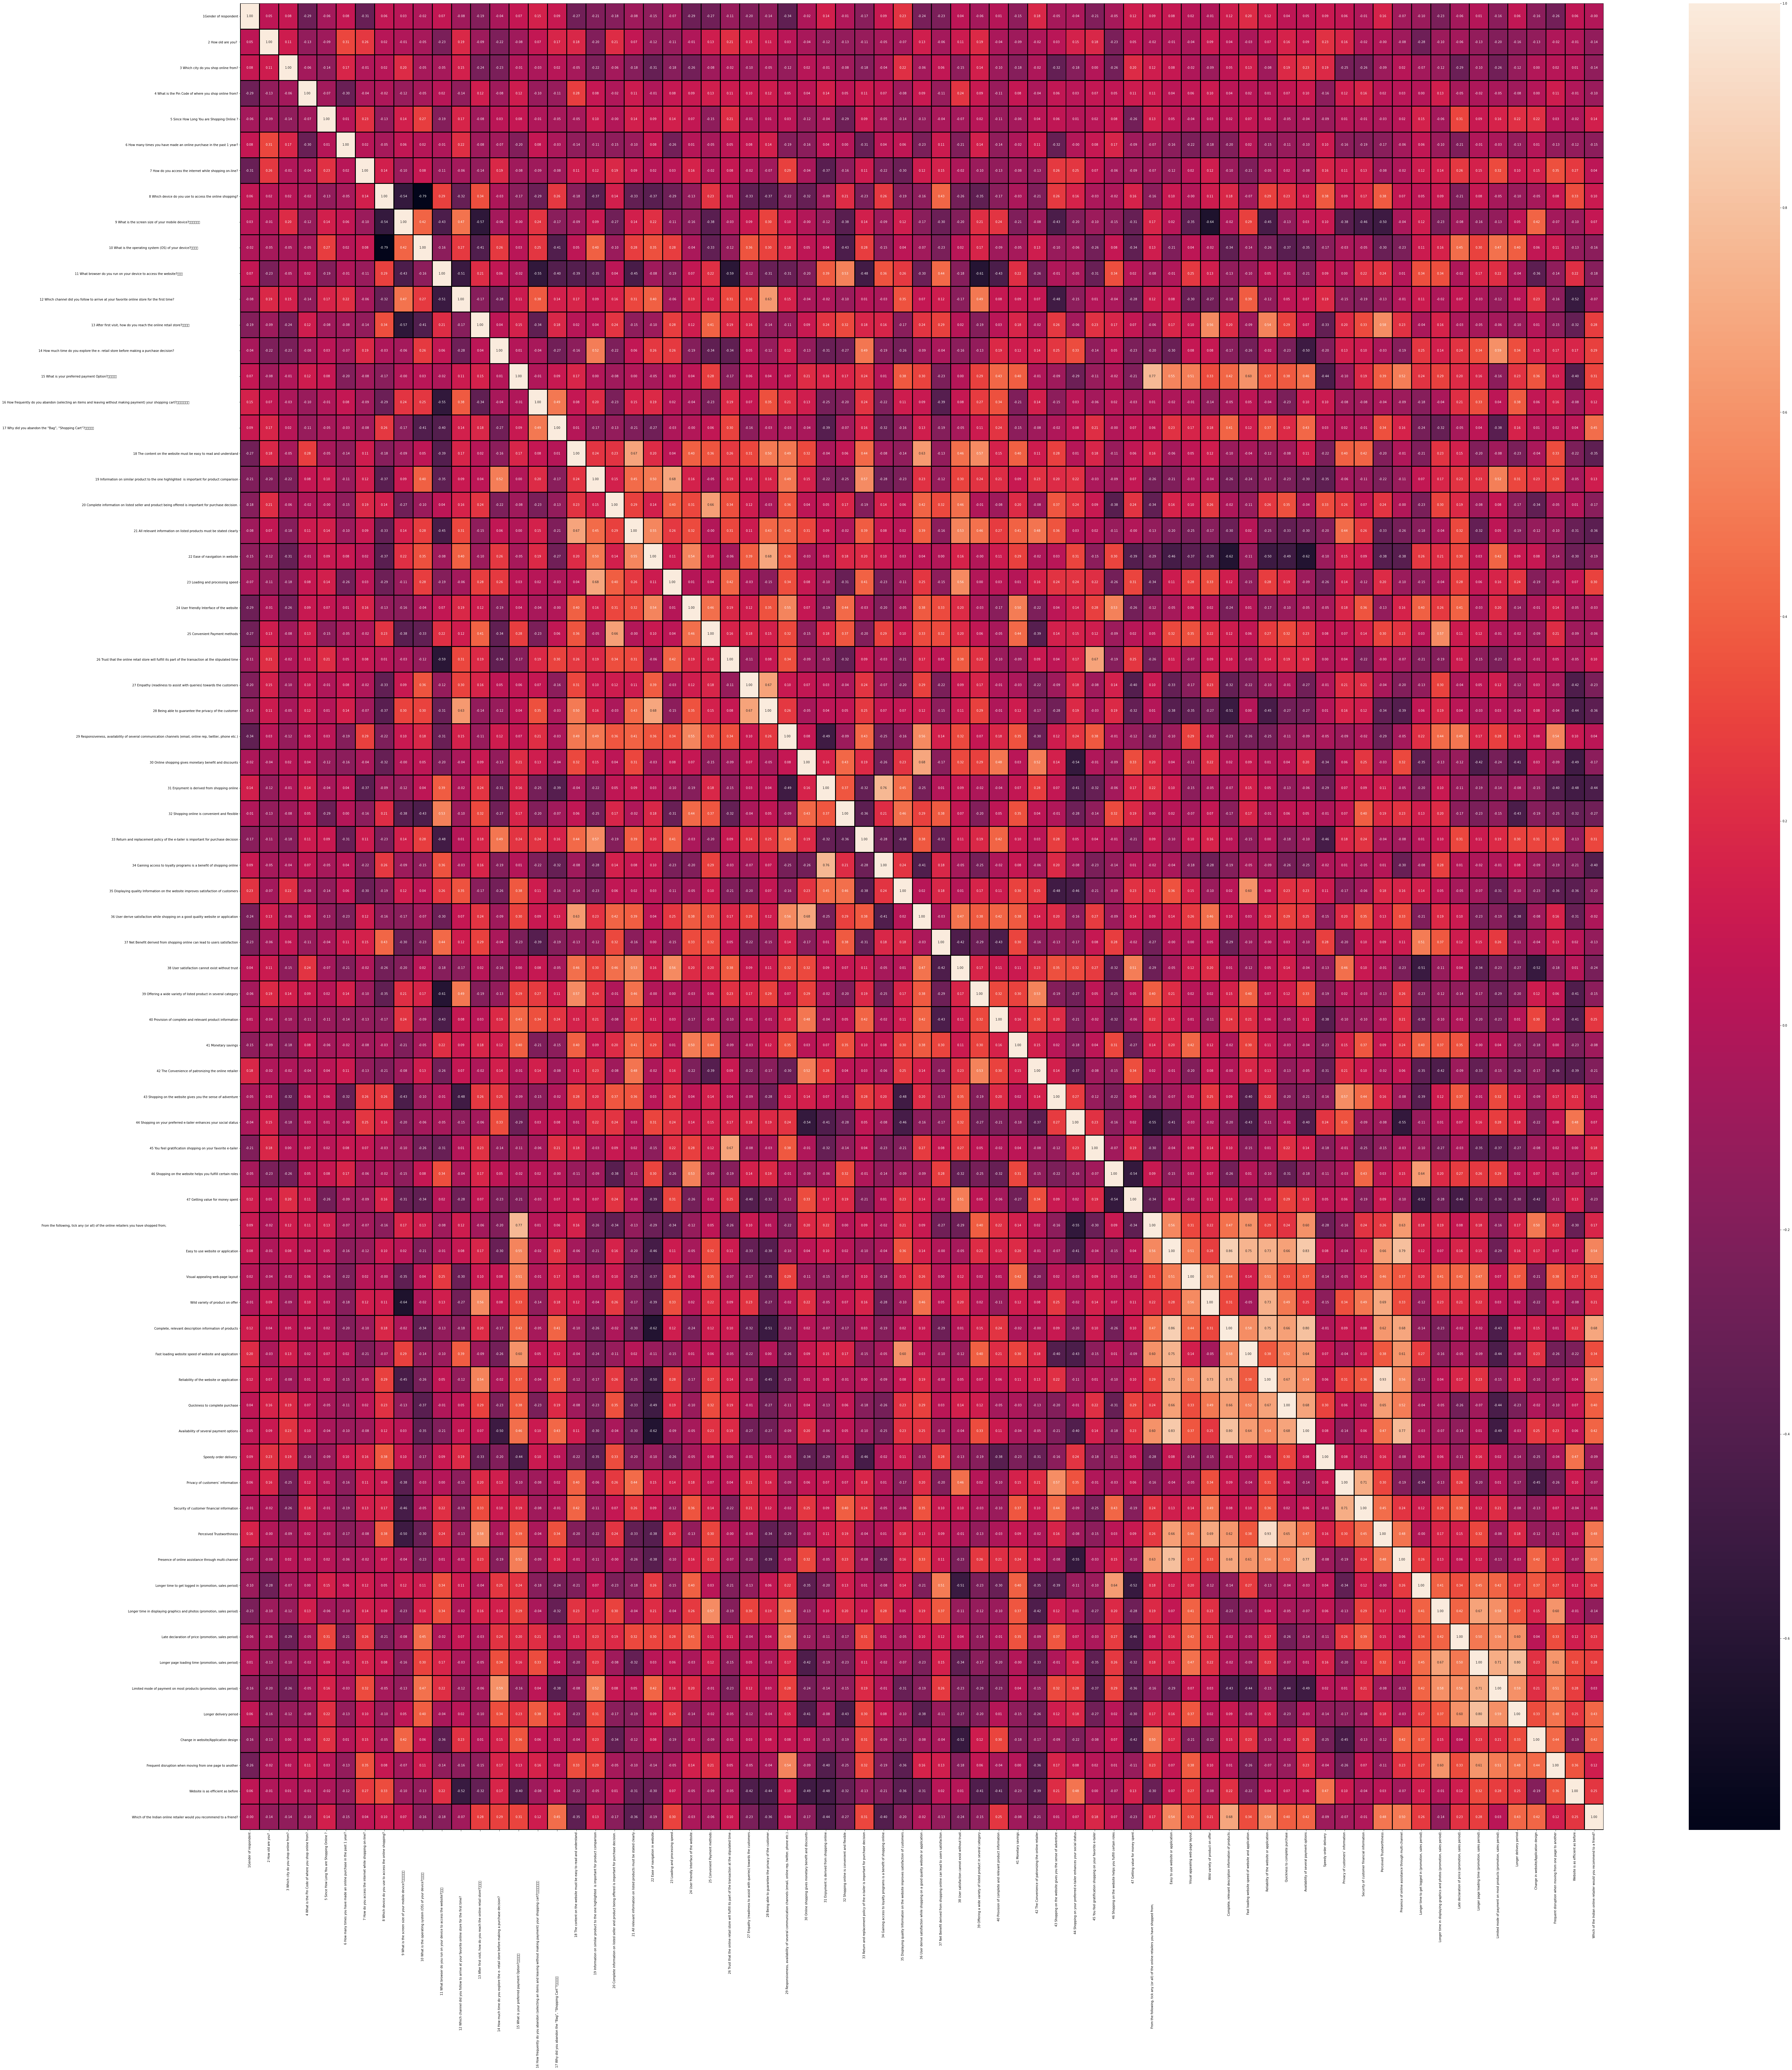

In [23]:
#we can visualize this correlation between then using heatmap

plt.figure(figsize=(100,110))
sns.heatmap(data.corr(),annot=True,linewidths=2,linecolor="black",fmt='.2f')

## Splitting the dataset into "X" as features and "Y" as the label or vector

In [24]:
X=data.drop("1Gender of respondent",axis=1)
Y=data["1Gender of respondent"]

# Splitting the data into train_test_split

In [25]:
from sklearn.model_selection import train_test_split, cross_validate
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=31, test_size=.20)

# Building the model

# Random Forest Classifier

In [28]:
random_forest = RandomForestClassifier()
random_forest.fit(x_test, y_test)
y_pred = random_forest.predict(x_train)
rf=accuracy_score(y_train, y_pred)
rf

0.6976744186046512

In [29]:
#we will use cross_validation to check whether model is overfitted

cross_rf=cross_val_score(random_forest,X,Y,cv=5)

#now i will take the mean of it

cross_rf=cross_val_score(random_forest,X,Y,cv=5).mean()
cross_rf

0.937037037037037

# KNeighborsClassifier

In [30]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(accuracy_score(y_test,y_pred))
cfm=confusion_matrix(y_test,y_pred)
print(cfm)
print(classification_report(y_test,y_pred,digits=2))

0.9074074074074074
[[33  2]
 [ 3 16]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        35
           1       0.89      0.84      0.86        19

    accuracy                           0.91        54
   macro avg       0.90      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



In [31]:
#we will use cross_validation to check whether model is overfitted

cross_knn=cross_val_score(knn,X,Y,cv=5)

#now i will take the mean of it

cross_knn=cross_val_score(knn,X,Y,cv=5).mean()
cross_knn

0.862753319357093

# LogisticRegression

In [32]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(accuracy_score(y_test,y_pred))

cfm=confusion_matrix(y_test,y_pred)
print(cfm)
print(classification_report(y_test,y_pred,digits=2))

0.9259259259259259
[[35  0]
 [ 4 15]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        35
           1       1.00      0.79      0.88        19

    accuracy                           0.93        54
   macro avg       0.95      0.89      0.91        54
weighted avg       0.93      0.93      0.92        54



In [33]:
#we will use cross_validation to check whether model is overfitted

cross_lr=cross_val_score(lr,X,Y,cv=5)

#now i will take the mean of it

cross_lr=cross_val_score(lr,X,Y,cv=5).mean()
cross_lr

0.8738644304682041

# Decision TreeClassifier

In [34]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred))
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

0.9814814814814815
[[35  0]
 [ 1 18]]


In [35]:
#we will use cross_validation to check whether model is overfitted

cross_dt=cross_val_score(dt,X,Y)

#now i will take the mean of it

cross_dt=cross_val_score(dt,X,Y).mean()
cross_dt

0.9592592592592591

# SVC

In [36]:
svm_clf=SVC()
svm_clf.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred))
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

0.9814814814814815
[[35  0]
 [ 1 18]]


In [37]:
cross_svm_clf=cross_val_score(svm_clf,X,Y,cv=5)

cross_svm_clf=cross_val_score(svm_clf,X,Y,cv=5).mean()
cross_svm_clf

0.8255765199161426

# GaussianNB

In [38]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
Y_pred = gaussian.predict(x_test)
print(accuracy_score(y_test,y_pred))
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

0.9814814814814815
[[35  0]
 [ 1 18]]


In [39]:
cross_gaussian=cross_val_score(gaussian,X,Y,cv=5)

cross_gaussian=cross_val_score(gaussian,X,Y,cv=5).mean()
cross_gaussian

0.758700209643606

# LinearSVC

In [40]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
print(accuracy_score(y_test,y_pred))
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

0.9814814814814815
[[35  0]
 [ 1 18]]


In [41]:
cross_linear_svc=cross_val_score(linear_svc,X,Y,cv=5)

cross_linear_svc=cross_val_score(linear_svc,X,Y,cv=5).mean()
cross_linear_svc

0.8214535290006989

# SGDClassifier

In [42]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)
print(accuracy_score(y_test,y_pred))
cfm=confusion_matrix(y_test,y_pred)
print(cfm)

0.9814814814814815
[[35  0]
 [ 1 18]]


In [43]:
cross_sgd=cross_val_score(sgd,X,Y,cv=5)

cross_sgd=cross_val_score(sgd,X,Y,cv=5).mean()
cross_sgd

0.8215234102026555

# Hyper-Parameter Tunning

In [44]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,roc_auc_score
from sklearn.model_selection import GridSearchCV
param_grid = {'algorithm': ['kd tree','brute'],
                       'leaf_size':[15,18,20],
                       'n_neighbors':[ 3, 5, 7,13]}
gridsearch = GridSearchCV(knn, param_grid )

In [45]:
gridsearch.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd tree', 'brute'],
                         'leaf_size': [15, 18, 20],
                         'n_neighbors': [3, 5, 7, 13]})

In [46]:
best_model = gridsearch.best_params_
best_model

{'algorithm': 'brute', 'leaf_size': 15, 'n_neighbors': 3}

In [47]:
knn=KNeighborsClassifier(algorithm='brute',leaf_size=15,n_neighbors=3)
knn.fit(X,Y)
y_pred=knn.predict(X)
acc_knn_score = round(knn.score(X, Y) * 100, 2)
acc_knn_score

96.28

# Plotting the ROC_AUC_CURVE

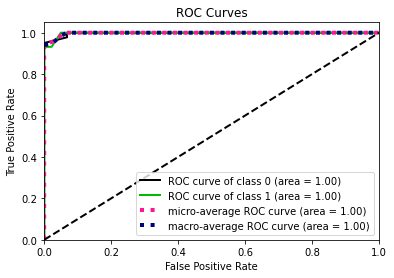

In [48]:
from sklearn.metrics import roc_curve
import scikitplot as skl
probas=knn.predict_proba(X)
skl.metrics.plot_roc(Y,probas)
plt.show()

## Saving The Data

In [49]:
import joblib
joblib.dump(knn,"CustomerRetentionModel.pkl")

['CustomerRetentionModel.pkl']

In [61]:
# save the model to through pickle
import pickle
filename = 'Customer_RetentionModel.sav'
pickle.dump(knn, open(filename, 'wb'))

# Loading the file result

In [62]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9444444444444444
